In [4]:
import SimpleITK as sitk
import os
from pylab import *
from pathlib import Path
import nibabel as nib

In [3]:
number_of_histogram_levels = 1024
number_of_match_points = 7
threshold_at_mean_intensity = True

In [11]:
rootdir = "C:/Users/Visagio/Desktop/dt/datasets/"

_, dirs, _ = next(os.walk(rootdir))
Path(f"C:/Users/Visagio/Desktop/dt/histogram-matched/").mkdir(exist_ok=True)

In [20]:
referenceIm = sitk.ReadImage(f'C:/Users/Visagio/Desktop/dt/skullstripped/{dirs[0]}/masked.nii.gz')
for examNumber in dirs:
    inputIm = sitk.ReadImage(f'C:/Users/Visagio/Desktop/dt/skullstripped/{examNumber}/masked.nii.gz')

    histMatchingFilter = sitk.HistogramMatchingImageFilter()
    histMatchingFilter.SetNumberOfHistogramLevels(number_of_histogram_levels)
    histMatchingFilter.SetNumberOfMatchPoints(number_of_match_points)
    histMatchingFilter.SetThresholdAtMeanIntensity(threshold_at_mean_intensity)
    outputIm = histMatchingFilter.Execute(inputIm, referenceIm)
    
    Path(f"C:/Users/Visagio/Desktop/dt/histogram-matched/{examNumber}").mkdir(exist_ok=True)
    sitk.WriteImage(outputIm, f"C:/Users/Visagio/Desktop/dt/histogram-matched/{examNumber}/matched.nii.gz", True)

In [53]:
def loadImages(examNumber):
    sourceImage = nib.load(f'C:/Users/Visagio/Desktop/dt/skullstripped/{examNumber}/masked.nii.gz')
    sourceData = sourceImage.get_fdata()
    sourceNumpy = np.rot90(np.array(sourceData))

    matchedImage = nib.load(f'C:/Users/Visagio/Desktop/dt/histogram-matched/{examNumber}/matched.nii.gz')
    matchedData = matchedImage.get_fdata()
    matchedNumpy = np.rot90(np.array(matchedData))
    
    return sourceNumpy, matchedNumpy

In [54]:
def showImages(sliceNumber, sourceNumpy, matchedNumpy):
    fig, ax = plt.subplots(1, 2,  sharex=True, sharey=True)

    ax[0].imshow(sourceNumpy[:, :, sliceNumber], cmap="gray")
    ax[0].set_title("Source")
    ax[0].set_axis_off()

    ax[1].imshow(matchedNumpy[:, :, sliceNumber], cmap="gray")
    ax[1].set_title("Matched")
    ax[1].set_axis_off()

    plt.show()

In [55]:
def plotHistograms(sliceNumber, sourceNumpy, matchedNumpy):
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

    ax[0].hist(sourceNumpy[:, :, sliceNumber].ravel(), bins=np.arange(1, 4000, 1), fc='k', ec='g');
    ax[0].set_title("Source")
    ax[0].grid(True)

    ax[1].hist(matchedNumpy[:, :, sliceNumber].ravel(), bins=np.arange(1, 4000, 1), fc='k', ec='r');
    ax[1].set_title("Matched")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

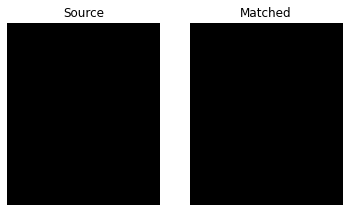

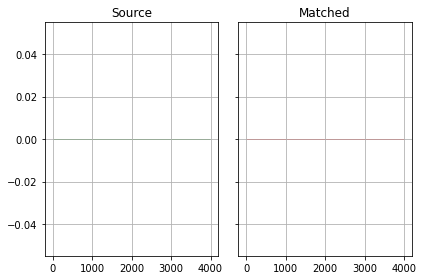

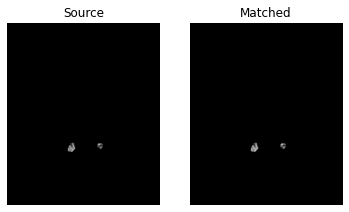

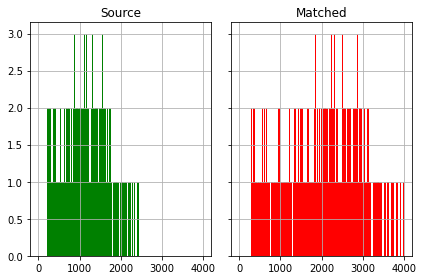

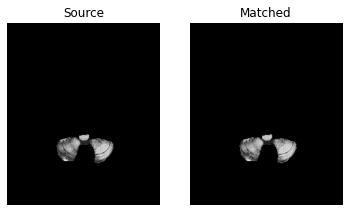

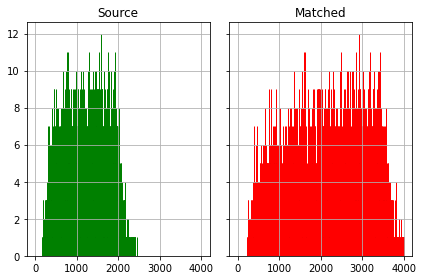

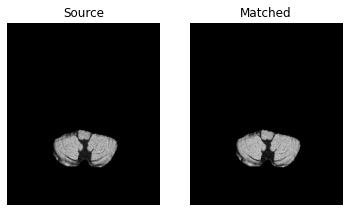

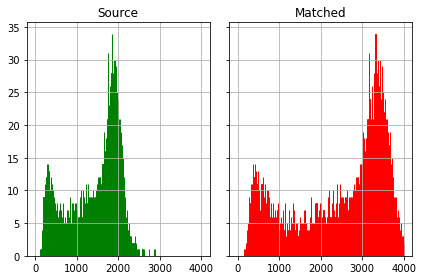

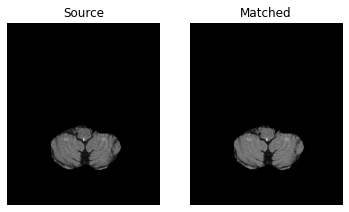

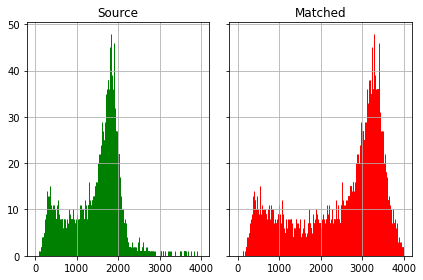

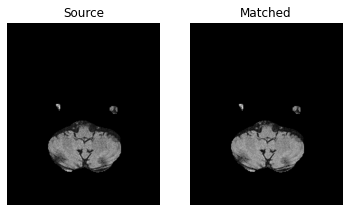

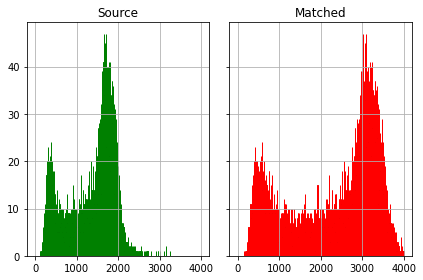

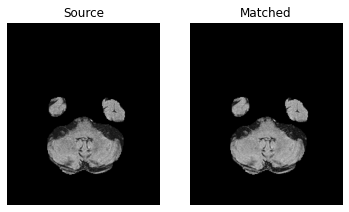

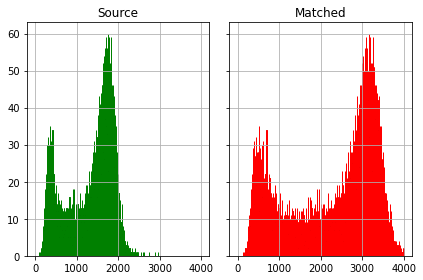

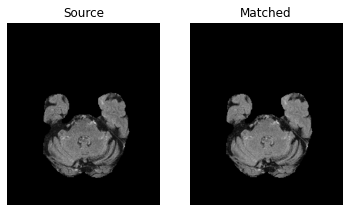

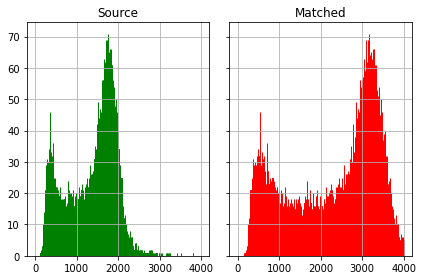

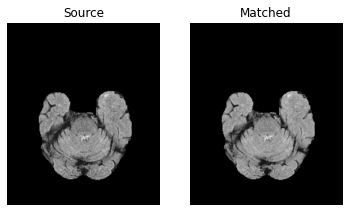

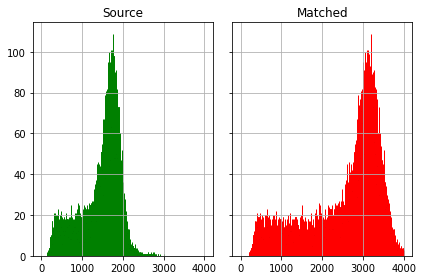

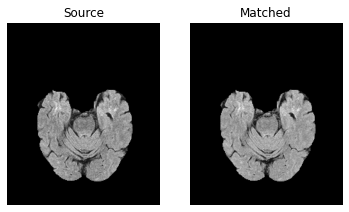

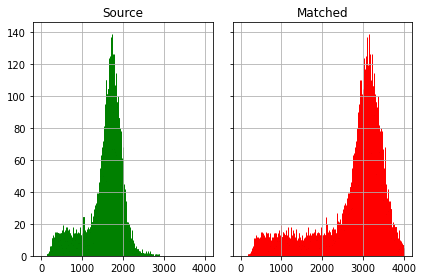

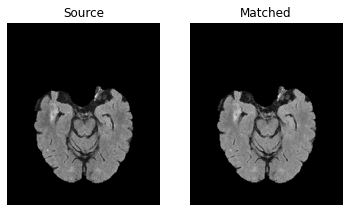

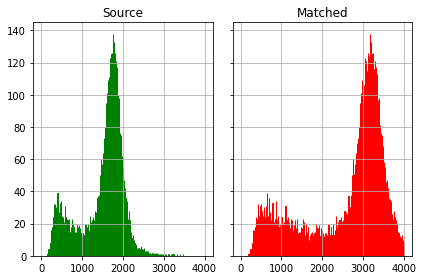

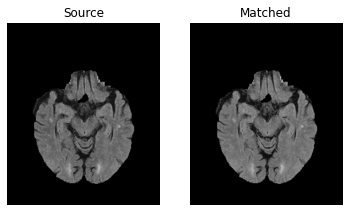

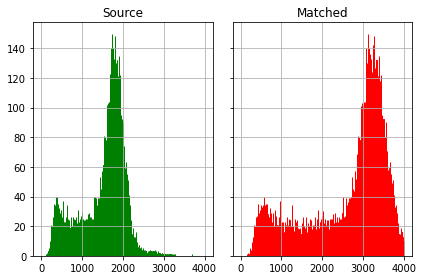

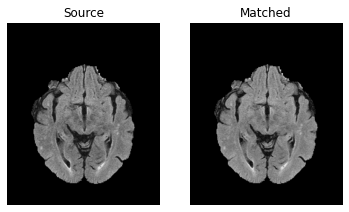

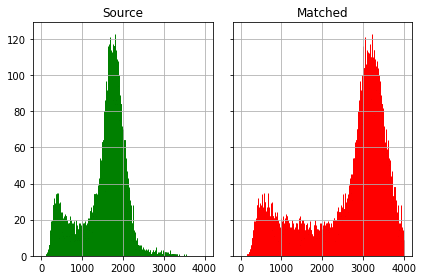

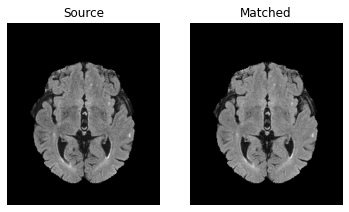

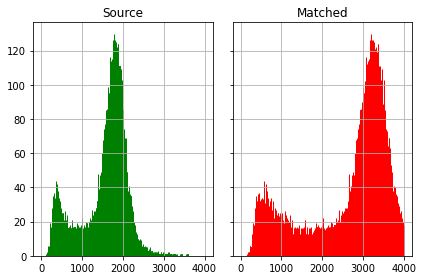

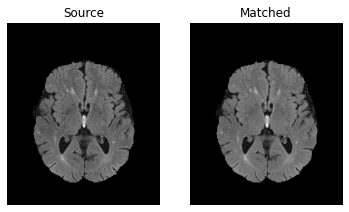

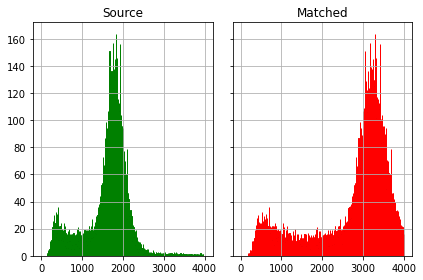

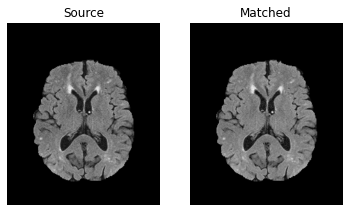

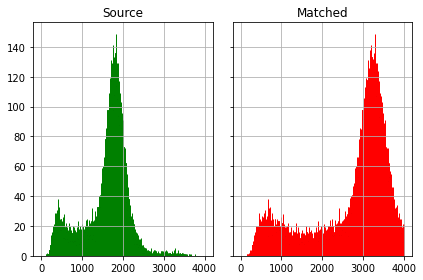

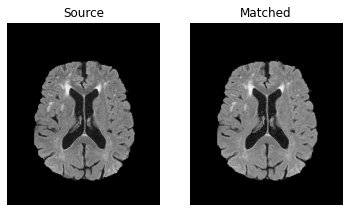

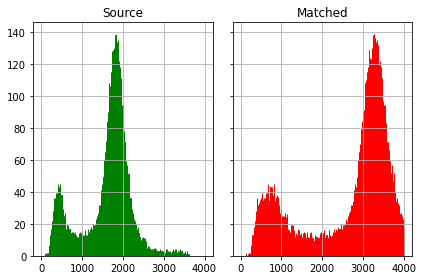

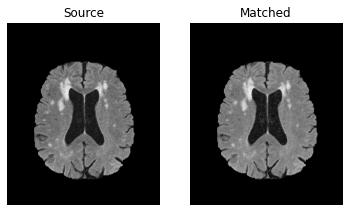

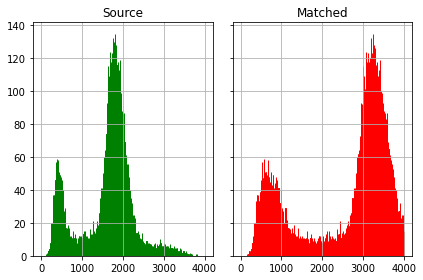

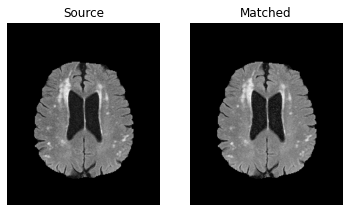

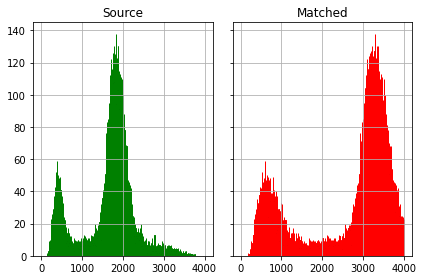

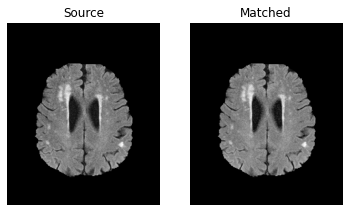

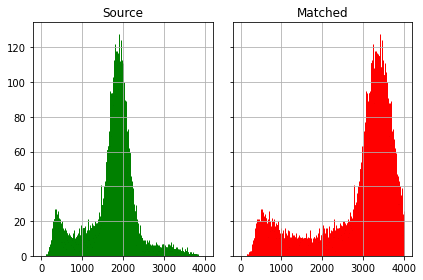

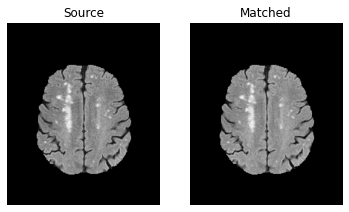

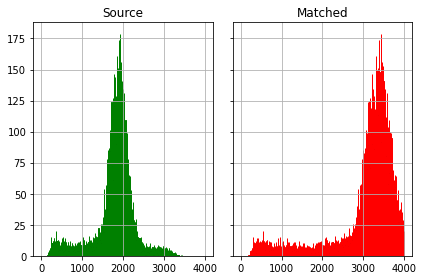

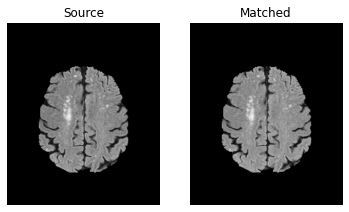

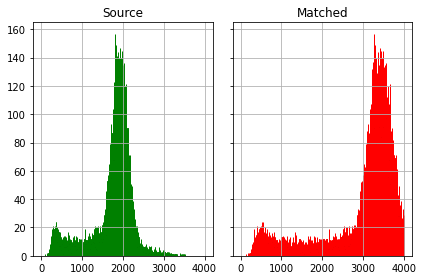

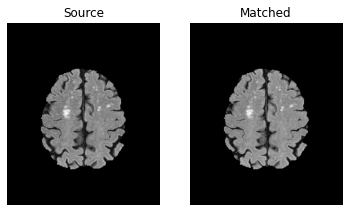

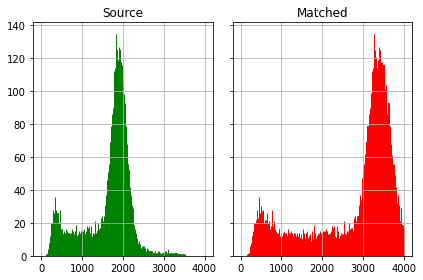

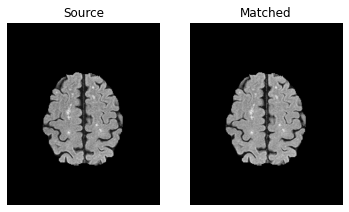

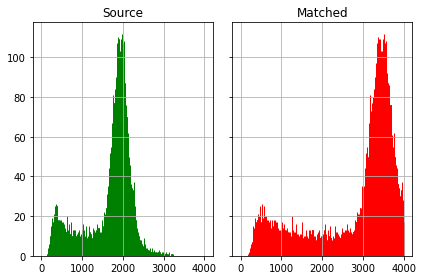

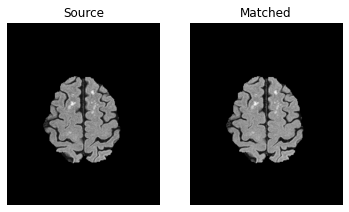

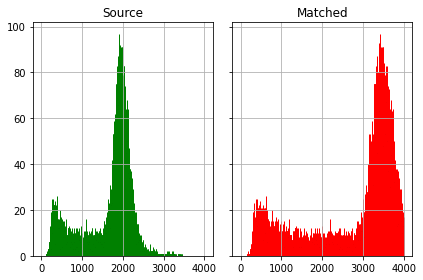

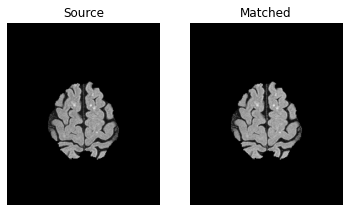

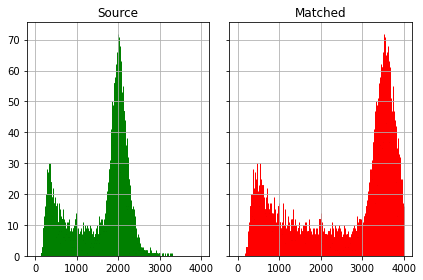

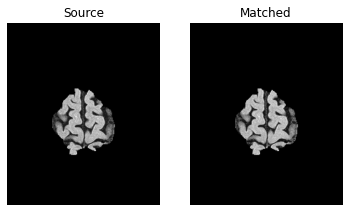

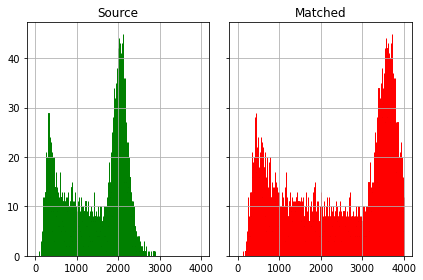

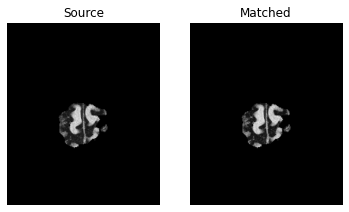

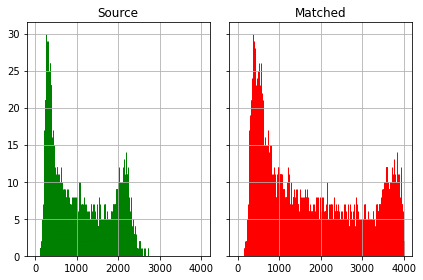

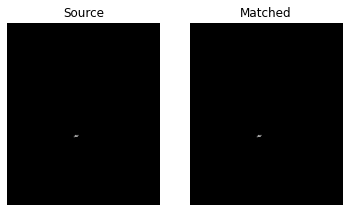

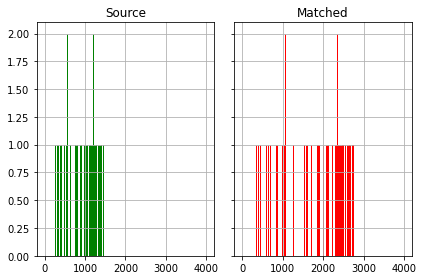

In [56]:
# for examNumber in dirs:
#     sourceNumpy, matchedNumpy = loadImages(examNumber)
#     showImages(20, sourceNumpy, matchedNumpy)
#     plotHistograms(20, sourceNumpy, matchedNumpy)
sourceNumpy, matchedNumpy = loadImages(6)
for sliceN in range(0,29):
    showImages(sliceN, sourceNumpy, matchedNumpy)
    plotHistograms(sliceN, sourceNumpy, matchedNumpy)